In [2]:
import os
os.getcwd()

'C:\\Users\\josep\\OneDrive\\Documents\\Para la Escuela\\Research\\Network Theory\\EquitablePartitions\\Jupyter_notebooks'

In [3]:
import os
os.chdir('..')

In [4]:
import os, sys
from importlib import reload
from matplotlib import pyplot as plt
from tqdm import tqdm
import networkx as nx
import ep_finder, lep_finder, graphs

In [3]:
graph = nx.random_geometric_graph(25,.5)

In [4]:
# Reloading cell if needed.
reload(ep_finder)
reload(lep_finder)

<module 'lep_finder' from 'C:\\Users\\josep\\OneDrive\\Documents\\Para la Escuela\\Research\\Network Theory\\EquitablePartitions\\lep_finder.py'>

In [5]:
relabeledGraph = graphs.relabel(graph)
ep_dict, lep_dict, coasestAndLocal = lep_finder.getEquitablePartitions(relabeledGraph,progress_bars=False)

In [29]:
lep_dict

dict_values([{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}])

In [30]:
ep_dict.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8])

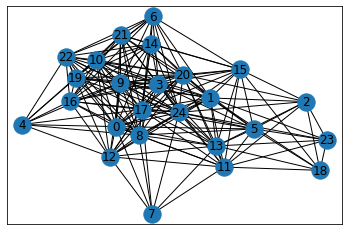

In [8]:
nx.draw_networkx(relabeledGraph)

In [5]:
import matplotlib.backends.backend_pdf as pdfSaver

radii tried: 100%|██████████| 20/20 [00:07<00:00,  2.64it/s]
<ipython-input-9-39bae7f583c8>:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
radii tried: 100%|██████████| 20/20 [09:07<00:00, 27.37s/it]


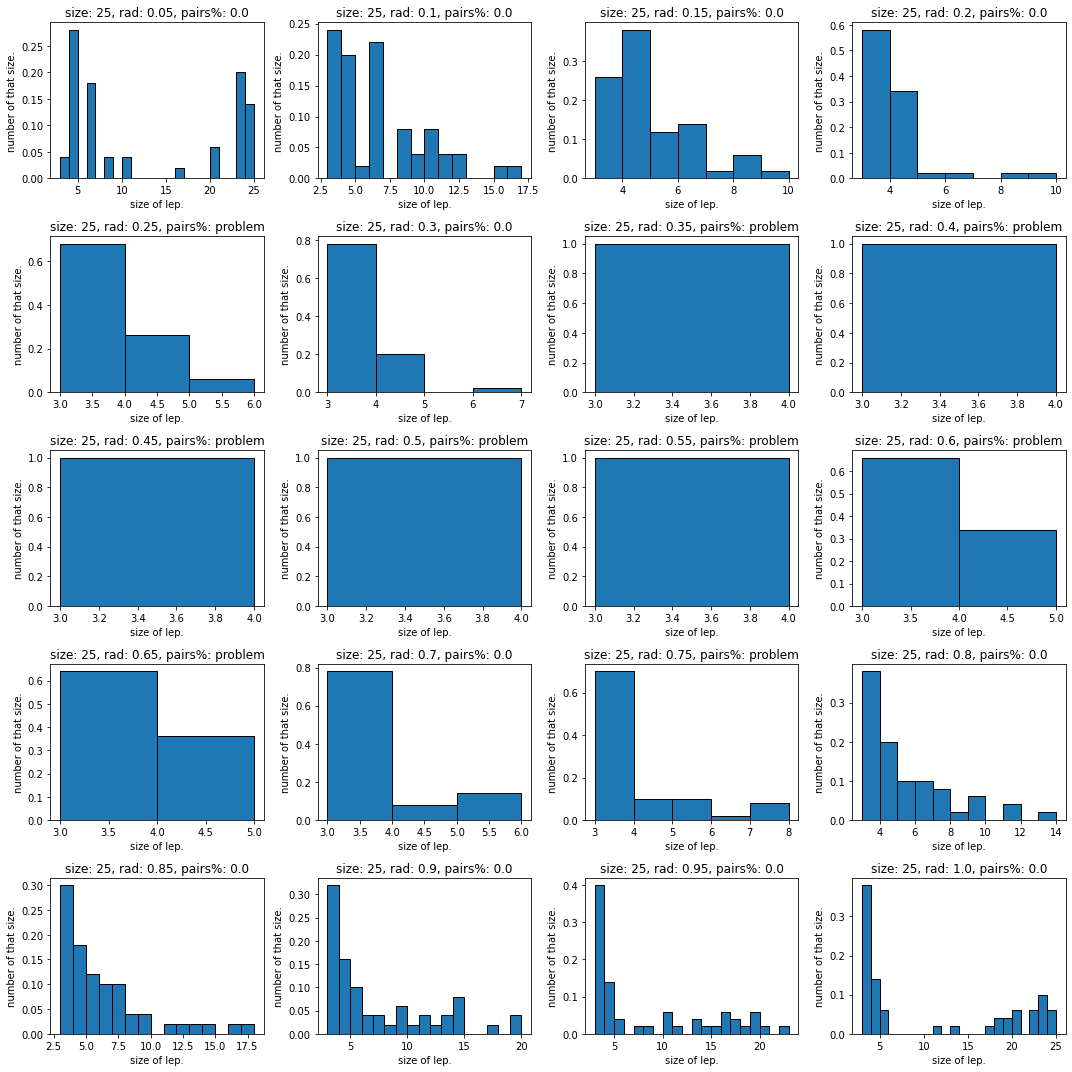

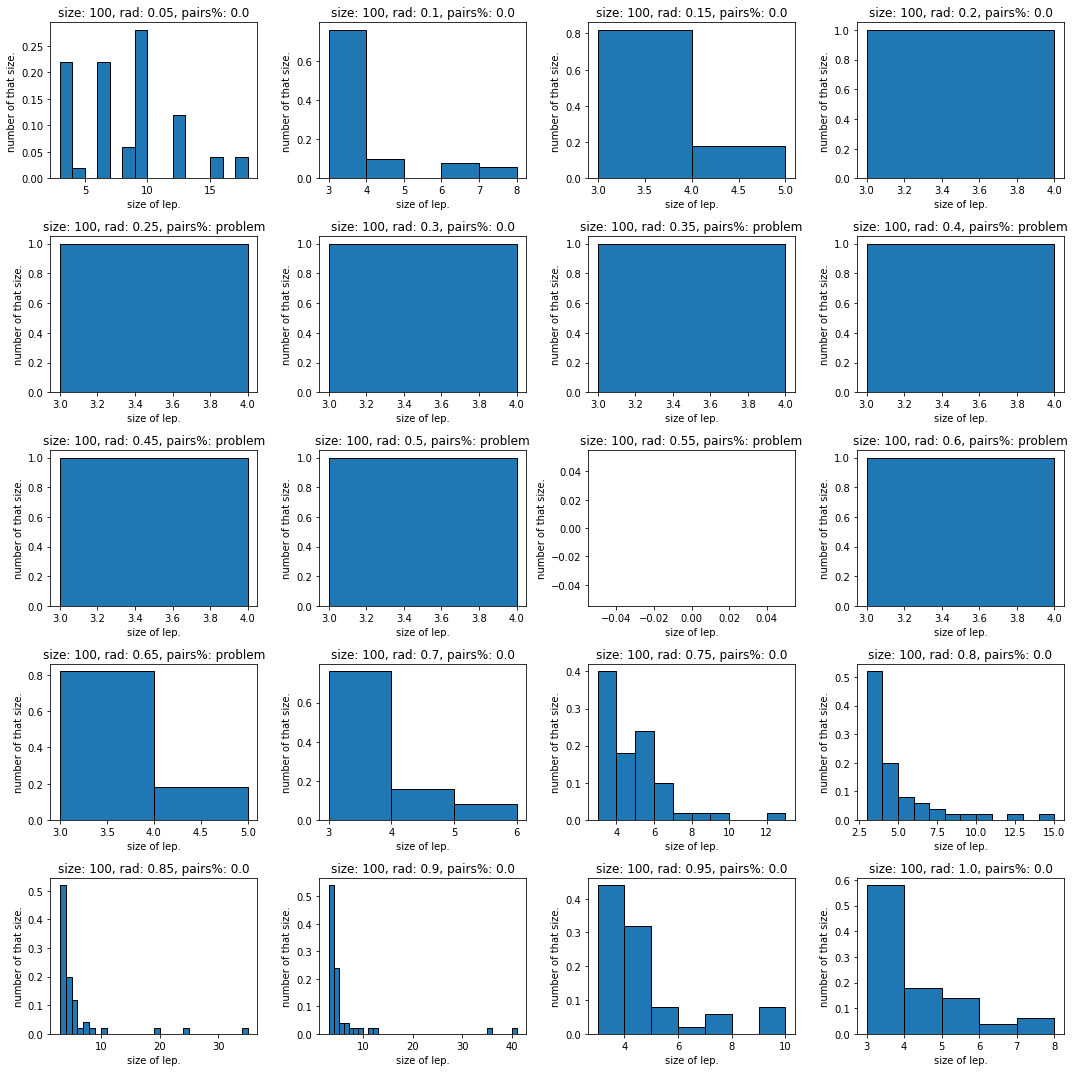

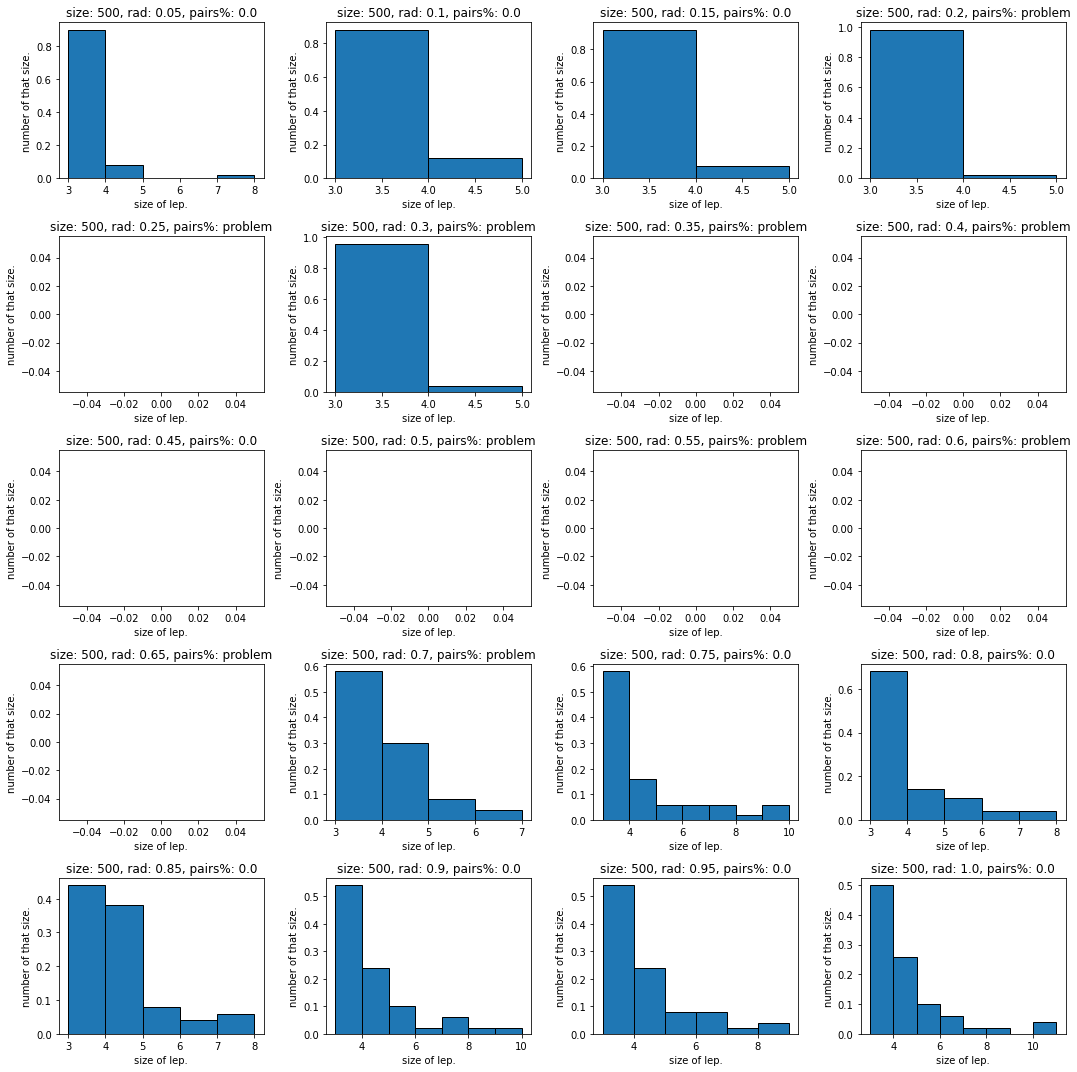

In [9]:
import numpy as np
pdf = pdfSaver.PdfPages("geometric_leps.pdf")
lengths = [rad/100 for rad in range(5,101,5)]
iterations = 50
nNodes_list = [25,100,500]
for nNodes in nNodes_list:
    row=-1
    lepSizes = []
    pdf_col_size = 4
    pdf_row_size = 5
    fig,ax = plt.subplots(pdf_row_size,pdf_col_size,figsize=(15,15))

    for index,rad in enumerate(tqdm(lengths,desc="radii tried")):
        lepSizes=[]
        total_leps=0
        mavericks=0
        for i in range(iterations):
            pairs=0
            total_leps=0
            graph=nx.random_geometric_graph(nNodes,rad)
            relabeledGraph = graphs.relabel(graph)
            ep_dict, lep_dict, coasestAndLocal = lep_finder.getEquitablePartitions(relabeledGraph,progress_bars=False)
            nontrivEp_dict, nontrivLep_list,hist_list,perc = graphs.NontrivialityData(graph,ep_dict,lep_dict,return_vals=True,plot=False,show_progress=False)
            
            for lep in nontrivLep_list:
                lep_size = 0
                total_leps+=1
                for lep_el in list(lep):
                    lep_size+=len(ep_dict[lep_el])
            if lep_size==2:
                pairs+=1
            else:
                lepSizes.append(lep_size)
        col = index%pdf_col_size
        if col==0:
            row+=1
        if total_leps==0:
            pairs_perc = 'problem'
        else:
            pairs_perc=pairs/total_leps
        ax[row][col].hist(lepSizes,bins=[i for i in range(3,max(lepSizes)+1)],density=True,ec='black')
        ax[row][col].set_xlabel("size of lep.")
        ax[row][col].set_ylabel("number of that size.")
        ax[row][col].set_title(f"size: {nNodes}, rad: {rad}, pairs%: {pairs_perc}")
        fig.tight_layout()
    pdf.savefig(fig)
    
    #fig.suptitle(f"Graphs of size: {nNodes}",fontsize=24)
    fig.show()
pdf.close()

In [4]:
pdf.close()